# Цифровое представление основных типов данных

## 1. Графические данные

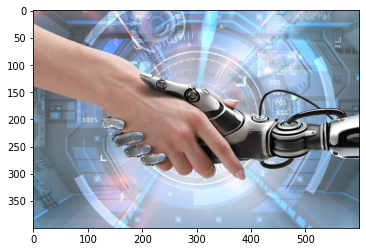

(400, 600, 3)
[[[218 149 167]
  [215 146 164]
  [211 144 161]
  ...
  [117 146 162]
  [116 145 161]
  [116 145 161]]

 [[215 148 165]
  [212 145 162]
  [207 143 159]
  ...
  [116 145 161]
  [116 145 161]
  [116 145 161]]

 [[209 147 162]
  [206 144 159]
  [202 141 156]
  ...
  [114 143 159]
  [114 143 159]
  [114 143 159]]

 ...

 [[104 146 171]
  [103 147 172]
  [105 149 174]
  ...
  [115 146 174]
  [115 146 174]
  [115 146 174]]

 [[106 145 174]
  [107 146 175]
  [109 148 177]
  ...
  [115 146 174]
  [116 147 175]
  [116 147 175]]

 [[108 145 174]
  [109 146 175]
  [109 148 177]
  ...
  [116 147 175]
  [116 147 175]
  [117 148 176]]]


In [2]:
import matplotlib.pyplot as plt
#from matplotlib.image import imread
from skimage.io import imread

url = 'https://www.osp.ru/FileStorage/DOCUMENTS_ILLUSTRATIONS/13234504/original.jpg'
orig_img = imread(url)


plt.imshow(orig_img)
plt.show()

print(orig_img.shape)
print(orig_img)

## ДЗ №1

1. Поместить в центр рисунка белый квадрат, занимающий 10% площади рисунка.

## 2. Видео и звук

### Видео поток

```python
pip install opencv-python
```

In [3]:
import cv2
from datetime import datetime

capture = cv2.VideoCapture(0 + cv2.CAP_DSHOW)

while True:
    rtrn, image = capture.read()
    if image is None: 
        from skimage import io
        image = io.imread('https://www.osp.ru/FileStorage/DOCUMENTS_ILLUSTRATIONS/13234504/original.jpg');
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    now = datetime.now()
    date_time = now.strftime("%d/%m/%Y, %H:%M:%S")
    cv2.putText(image, date_time, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1., (0,255,255), 2)
    cv2.imshow("OpenCV", image) 
    
    if cv2.waitKey(1) == 27: 
        break

capture.release()
cv2.destroyAllWindows()

## ДЗ №2

1. Поместить в в случайном месте каждого кадра видеопотока белый кварат со стороной 50 px.

### Аудио данные

```python
pip install librosa
```

#### ESC-50: Dataset for Environmental Sound Classification

https://dagshub.com/kinkusuma/esc50-dataset

In [4]:
import numpy as np
import librosa
import soundfile as sf
import io
from six.moves.urllib.request import urlopen

audio_data = 'https://dagshub.com/kinkusuma/esc50-dataset/raw/3b812aa828f357df417069600a096c31816c5ef3/dataset/1-17970-A-4.wav'
data, sample_rate = sf.read(io.BytesIO(urlopen(audio_data).read()))
#data, sample_rate = librosa.load(audio_data, sr=None)

In [5]:
import IPython.display as ipd
ipd.Audio(audio_data)

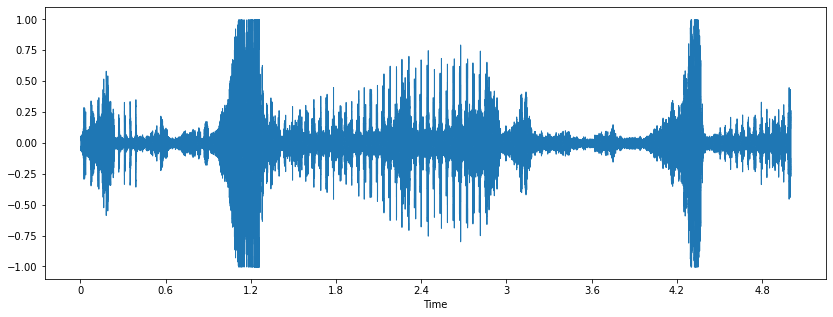

In [6]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, sr=sample_rate)

In [6]:
left = 0
right = 220000

print(data.shape)
print(data[left:right].max() - data[left:right].min())

(220500,)
1.999969482421875


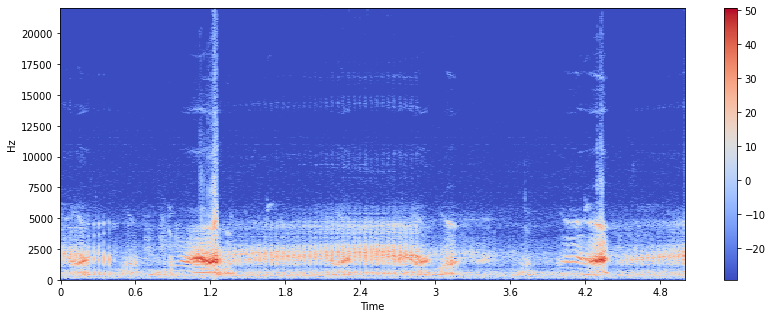

In [7]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

In [9]:
three_seconds = sample_rate * 3
data_ = data[:three_seconds]

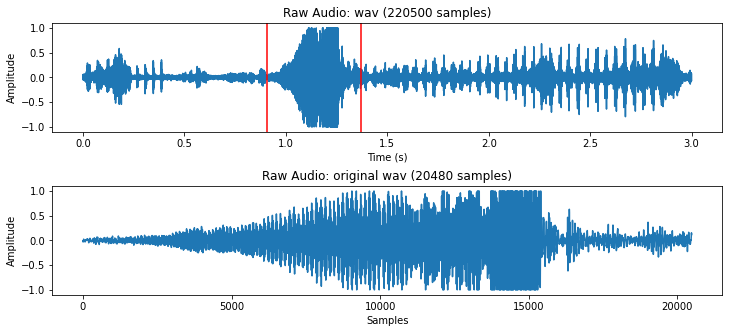

In [10]:
timesteps = np.arange(len(data_)) / sample_rate  # in seconds

fig, ax = plt.subplots(2, figsize=(12, 5))
fig.subplots_adjust(hspace=0.5)

# plot the entire clip 
ax[0].plot(timesteps, data_)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Raw Audio: {} ({} samples)'.format('wav', len(data)))


n_fft = 1024*20 # frame length 
start = 40000 # start at a part of the sound thats not silence.. 
x = data_[start:start+n_fft]

# mark location of frame in the entire signal
ax[0].axvline(start/sample_rate, c='r') 
ax[0].axvline((start+n_fft)/sample_rate, c='r')

# plot N samples 
ax[1].plot(x)
ax[1].set_xlabel('Samples')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Raw Audio: {} ({} samples)'.format('original wav', len(x)));

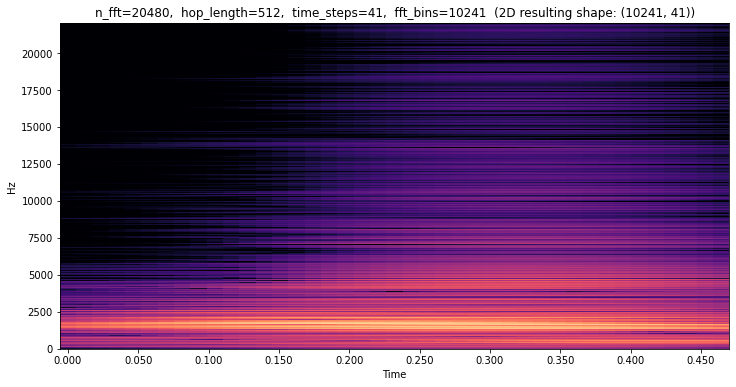

In [10]:
hop_length = 512
stft = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)
stft_magnitude, stft_phase = librosa.magphase(stft)
stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(stft_magnitude_db, x_axis='time', y_axis='linear', 
                         sr=sample_rate, hop_length=hop_length)

title = 'n_fft={},  hop_length={},  time_steps={},  fft_bins={}  (2D resulting shape: {})'
plt.title(title.format(n_fft, hop_length, 
                       stft_magnitude_db.shape[1], 
                       stft_magnitude_db.shape[0], 
                       stft_magnitude_db.shape));

## ДЗ №3

1. Найти в обучающем наборе esc50-dataset WAV файл с лаем собаки;
2. визуально по графику амплитуды звуковой волны найти участок файла непосредственно содержащий звук лая;
3. построить спектрограмму для найденного участка;
4. подумать (и реализовать), как с помощиью цифрового представления звука можно автоматизировать удаление части файла, не содержащего полезной информации.

## 3. Таблицы и временные ряды

In [11]:
import pandas as pd

url = 'https://raw.githubusercontent.com/pcsanwald/kaggle-titanic/master/train.csv'
df = pd.read_csv(url, on_bad_lines='skip', delimiter=',')
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


[[0.000e+00 5.800e+01]
 [1.000e+00 6.300e+01]
 [2.000e+00 7.000e+01]
 ...
 [3.074e+03 1.800e+01]
 [3.075e+03 3.100e+01]
 [3.076e+03 2.900e+01]]


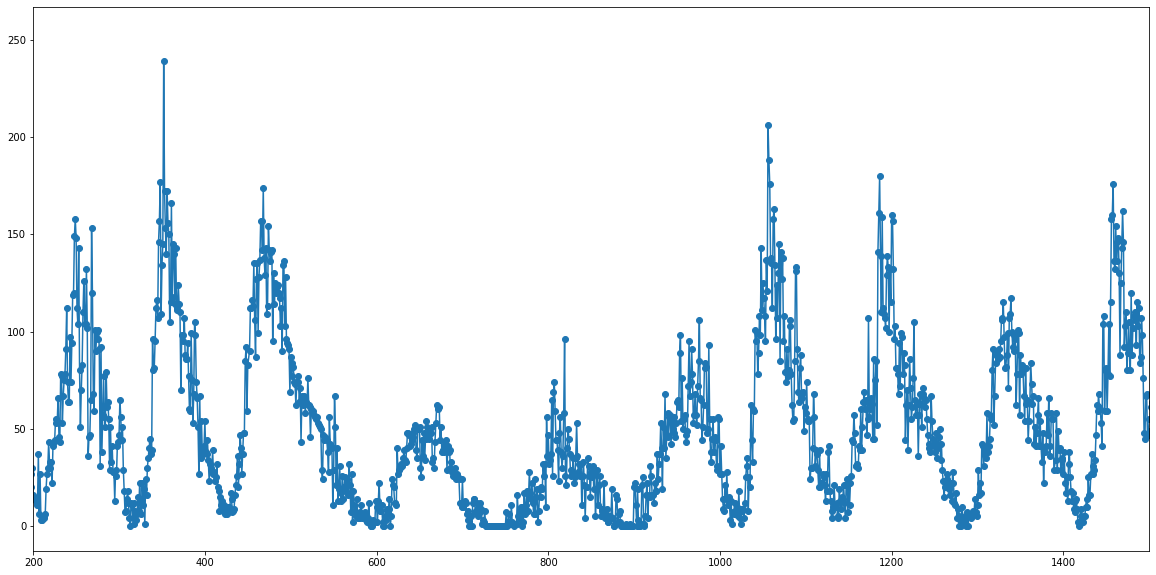

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import requests

series = np.empty((0,2), dtype='f')

url = 'https://raw.githubusercontent.com/sjackman/bc/master/data/astro/sunspot.txt'
response = requests.get(url)
data = response.text
data = data.split("\n") # then split it into lines

#print(data)
for i,line in enumerate(data):
    if i<3: continue
    words = line.split()
    if len(words) < 6: continue
    #print([[i-3], float(words[-1])])
    series = np.append(series, [[i-3, float(words[-1])]], axis=0)
    
print(series)
X = series[:,0] 
y = series[:,1]

plt.figure(figsize=(20,10))
plt.plot(X,y)
plt.scatter(X,y)
plt.xlim(200,1500)
plt.show()

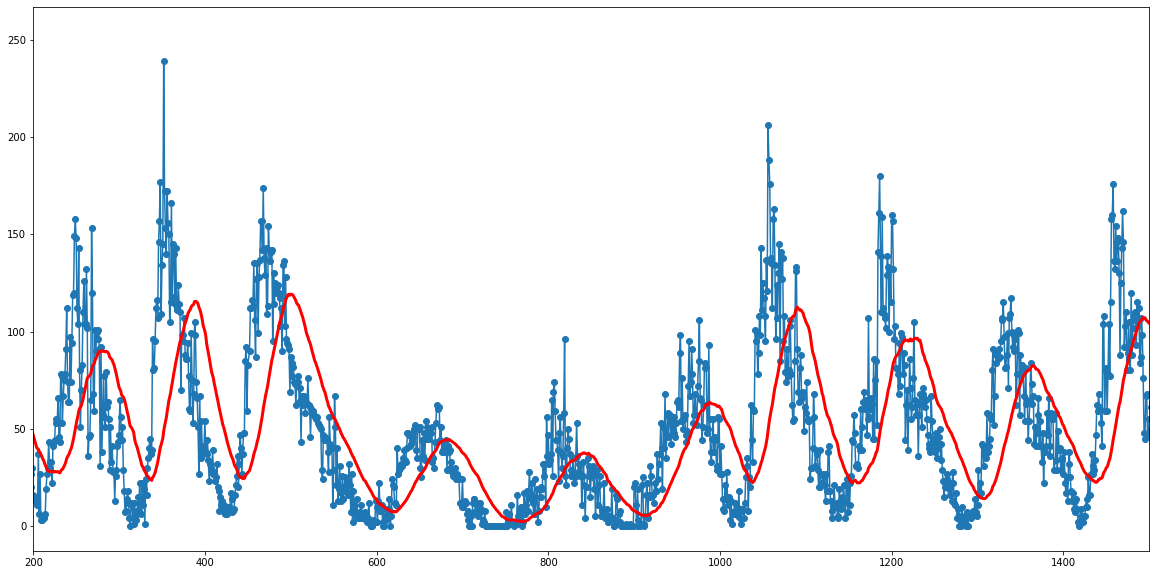

In [13]:
def moving_average(series, windowsize):
    result = [series[windowsize-1]]
    for t in range(windowsize,len(series)):
        result.append(sum(series[t-n] for n in range(windowsize)) / (windowsize))
    return result
    
k = 50
y_ma = moving_average(y,k)

plt.figure(figsize=(20,10))
plt.plot(X,y)
plt.scatter(X,y)
plt.plot(X[k-1:], y_ma, c='r', linewidth=3)
plt.xlim(200,1500)
plt.show()

### Местоположение автобусов города Казани

http://data.kzn.ru/dinamic_datasets/bus

In [14]:
import urllib.request
import json

url = "http://data.kzn.ru:8082/api/v0/dynamic_datasets/bus.json"
req = urllib.request.Request(url)
r = urllib.request.urlopen(req).read()
data = json.loads(r.decode('utf-8'))
print(data[0])

{'updated_at': '2022-07-08 15:24:53 (Europe/Moscow)', 'data': {'GaragNumb': '2663', 'Marsh': '6', 'Graph': '8', 'Smena': '1', 'TimeNav': '08.07.2022 15:24:53', 'Latitude': '55.837639', 'Longitude': '49.081159', 'Speed': '0', 'Azimuth': '1'}}


In [15]:
url = "http://data.kzn.ru:8082/api/v0/dynamic_datasets/bus/2663.json"
req = urllib.request.Request(url)
r = urllib.request.urlopen(req).read()
data = json.loads(r.decode('utf-8'))
print(data)

{'updated_at': '2022-07-08 15:24:53 (Europe/Moscow)', 'data': {'GaragNumb': '2663', 'Marsh': '6', 'Graph': '8', 'Smena': '1', 'TimeNav': '08.07.2022 15:24:53', 'Latitude': '55.837639', 'Longitude': '49.081159', 'Speed': '0', 'Azimuth': '1'}}


In [16]:
import numpy as np
import threading

location = []

run_num = 0
def run_check():    
    global run_num, location
    if run_num < 3:
        threading.Timer(100.0, run_check).start()
    url = "http://data.kzn.ru:8082/api/v0/dynamic_datasets/bus/2663.json"
    req = urllib.request.Request(url)
    r = urllib.request.urlopen(req).read()
    data = json.loads(r.decode('utf-8'))
    print(data['data']['Latitude'], data['data']['Longitude'])
    location.append([float(data['data']['Latitude']), float(data['data']['Longitude'])])
    run_num += 1
 
run_check()

55.841187 49.082653
55.842224 49.084283


In [7]:
location = [[55.841187, 49.082653], [55.842224, 49.084283]]
print(location)

[[55.841187, 49.082653], [55.842224, 49.084283]]


### Работа с геоданными в Python и Jupyter

https://proglib.io/p/rabota-s-geodannymi-v-python-i-jupyter-2021-03-22

```python
pip install ipyleaflet
```

In [10]:
from ipyleaflet import AntPath, WidgetControl
from ipyleaflet import Map, Marker, Popup
from ipywidgets import IntSlider, jslink
from ipywidgets import HTML

m = Map(center=tuple(location[0]), zoom=13)

bus_path = AntPath(
    locations=location,
    dash_array=[1, 10],
    delay=1000,
    color='#9500ff',
    pulse_color='#9500ff'
)

m.add_layer(bus_path)

start_marker = Marker(location=tuple(location[0]))
m.add_layer(start_marker)

finish_marker = Marker(location=tuple(location[-1]))
m.add_layer(finish_marker)

start = HTML()
finish = HTML()
start.value = "Старт"                                                                      
finish.value = "Финиш!"                                                                      
start_marker.popup = start
finish_marker.popup = finish

zoom_slider = IntSlider(description='Масштаб:', min=11, max=15, value=15)
jslink((zoom_slider, 'value'), (m, 'zoom'))
widget_control1 = WidgetControl(widget=zoom_slider, position='topright')
m.add_control(widget_control1)

m

Map(center=[55.841187, 49.082653], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

## ДЗ №4

1. Выбрать любой казанский автобусный маршрут;
2. проследить с помощью API сайта data.kzn.ru за автобусом выбранного маршрута достаточное количество времени, чтобы сформировать представление о всём пути следования автобуса;
3. изобразить маршрут на карте; 
4. подумайте, как найти правильный центр рисунка;
5. подумайте как найти и указать на рисунке остановки выбранного маршрута.

## 4. Тексты

### Сбор данных через VK API

1. Авторизуйтесь ВКонтакте и зайдите на страничку разработчиков **https://dev.vk.com/**

2. Нажимите на кнопку **"Создать приложение"**.

3. Введите имя, тип Standalone, нажите **"Подключить приложение"**. 

4. Подтвердите действие.

5. После создания приложения зайдите в его настройки и скопируйте его идентификатор. Нажмите на кнопку **"Редактировать"** рядом с нужным приложением. В адресной строке появится его id. \
Из этой ссылки: https://vk.com/editapp?id=8031498 видно, что id=8031498.

6. Соберите ссылку для получения ключа.\
Плюсом токена для параноиков является то, что он может быть выдан на определённый срок.\
Полезная информация по настройкам: 
https://dev.vk.com/api/access-token/implicit-flow-user \\
Токен можно получить прямо из браузера. Для этого нужно только перейти по правильной ссылке. Как составить правильную ссылку:\
https://oauth.vk.com/authorize?client_id=8031498&display=page&redirect_uri=https://oauth.vk.com/blank.html&response_type=token&v=5.103&state=123456

7. Перейдите по собранной ссылке.\
Вы получите access_token — строку наподобие:  **f367ca560512280f3668289211770e74afadd78ca79c5198a6f64875b63b060de43a339a3b4110e49b902** \
Она появится в адресной строке, подписанная как access_token.\
https://oauth.vk.com/blank.html#access_token=f367ca560512280f3668289211770e74afadd78ca79c5198a6f64875b63b060de43a339a3b4110e49b902&expires_in=86400&user_id=8031498&state=123456

In [1]:
token = ''

In [14]:
# https://vk.com/mashinnoe_obuchenie_ai_big_data 
ID = 'mashinnoe_obuchenie_ai_big_data'

import requests
from datetime import datetime

num_item = 0
json_response = requests.get(('https://api.vk.com/method/wall.get?count=10&offset={}&domain={}&v=5.103&access_token=' + token).\
                        format(0, ID)).json()

if json_response.get('error'):
    print(json_response.get('error'))
else:
    for item in json_response['response']['items']:
        print(num_item, ": ", datetime.fromtimestamp(item['date']))
        print(item['text'])
        print('--------------')
        num_item += 1

0 :  2022-09-19 10:12:11
https://t.me/ai_machinelearning_big_data - 1 канал вместо тысячи мл учебников

https://t.me/data_analysis_ml - канал для аналитиков данных

https://t.me/machinelearning_interview - вопросы на собеседовании мл

https://t.me/machinelearning_ru - Огромное количество полезных мл статей на русском языке

https://t.me/python_job_interview - Здесь собраны реальные вопросы с собеседований для устройства на работу

https://t.me/datascienceiot - библиотека мл книг

https://t.me/ArtificialIntelligencedl - искусственный интеллект

https://t.me/datascienceml_jobs - работа в области Data Science

https://t.me/machinee_learning - наш мл чат

https://t.me/sqlhub -sql

https://t.me/rust_code - язык RUST

https://t.me/joinchat/kW0kD7el5uljZTVi - нейронные сети

https://t.me/python_djangojobs - работа для питонистов

https://t.me/pythonl - python

https://t.me/pro_python_code русскоязычные python статьи

https://t.me/pythonlbooks - огромная библиотека бесплатных Python книг

http

## ДЗ № 5

1. Создайте приложения для работы с API VK;
2. получите свой токен для автоматизации действий в соцсети;
3. соберите не менее 2000 не пустых текстовых сообщений со стены любой открытой группы;
4. сохраните сообщения во внешний файл для дальнейшего чтения и работы.